# Charting Facebook Messages with Python

I consider myself an intermediate user of Python. However, most of my projects have been web based using libraries such as Flask. So I started looking at one of the other great uses for Python, data analytics and visualisation.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import csv
import json

# data = {}

# with open('message.json') as f:
#     data = json.loads(f.read())

# csvwriter = csv.writer(open('test.csv', 'w'), delimiter='\t')
# csvwriter.writerow(["sender", "timestamp", "content", "type"])

# for message in data['messages']:
#     if 'content' in message.keys():
#         csvwriter.writerow([message['sender_name'], message['timestamp_ms'], message['content'], message['type']])


def dateparse(timestamp):
    pd.to_datetime(timestamp, unit='ms')

messages_df = pd.read_csv('test.csv', delimiter='\t', parse_dates=True, date_parser=dateparse)
messages_df['timestamp'] = pd.to_datetime(messages_df['timestamp'], unit='ms')
messages_df['year'] = pd.DatetimeIndex(messages_df['timestamp']).year
messages_df['month'] = pd.DatetimeIndex(messages_df['timestamp']).month
messages_df['month_year'] = pd.to_datetime(messages_df['timestamp']).dt.to_period('M')

messages_df.head()

,sender,timestamp,content,type,year,month,month_year
0,Samantha Perry,2018-11-12 16:03:56.886,What other veg can I throw in?,Generic,2018,11,2018-11
1,Samantha Perry,2018-11-12 16:03:51.409,Hahahaha I like to experiment,Generic,2018,11,2018-11
2,Tim Thompson,2018-11-12 16:02:04.704,That's exactly what I do with Hairy Bikers exc...,Generic,2018,11,2018-11
3,Samantha Perry,2018-11-12 16:01:43.019,I've got 6 carrots,Generic,2018,11,2018-11
4,Samantha Perry,2018-11-12 16:01:37.014,I've got so many carrots,Generic,2018,11,2018-11


In [4]:
chart_df = pd.DataFrame({'count' : messages_df.groupby( [messages_df['month_year']] ).size()})
chart_df.head()

,count
month_year,
2016-08,7368
2016-09,14825
2016-10,17485
2016-11,11384
2016-12,7361


In [5]:
chart_df = pd.DataFrame({'count' : messages_df.groupby( [messages_df['month_year'], messages_df['sender']] ).size()}).unstack()
chart_df = chart_df[chart_df.index != '2018-11']
chart_df.head()

count             
sender     Samantha Perry Tim Thompson
month_year                            
2016-08              4445         2923
2016-09              8627         6198
2016-10             10024         7461
2016-11              7186         4198
2016-12              4568         2793

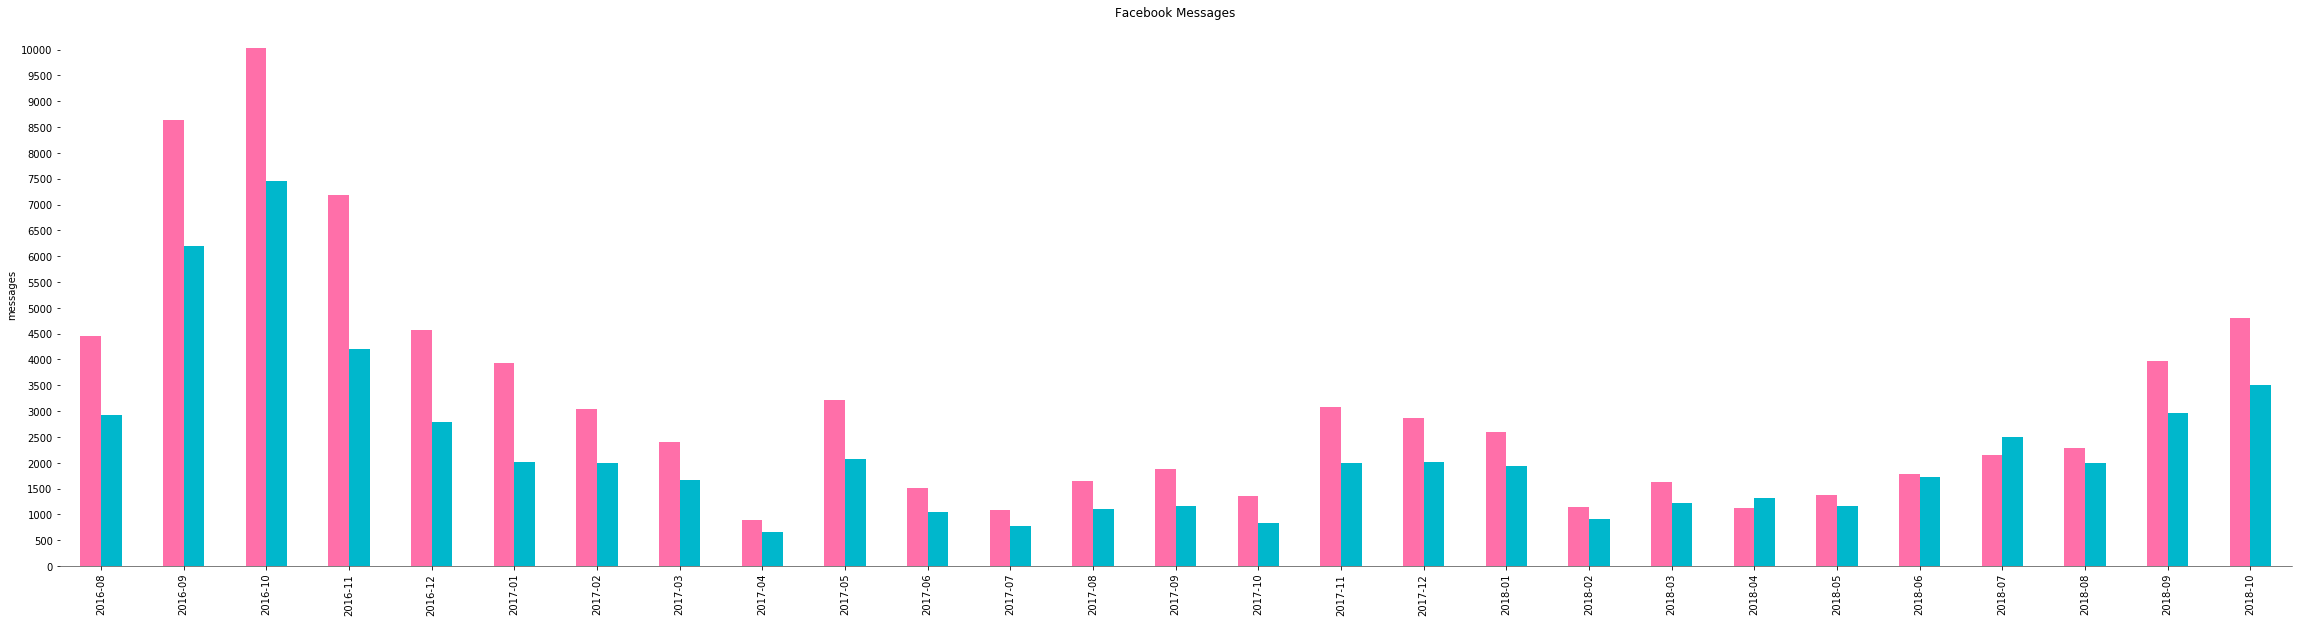

In [228]:
ax = chart_df.plot.bar(
    figsize=(40,10), 
    yticks=np.arange(0, 10001, 500), 
    title='Facebook Messages',
    legend=False,
    color=[(1,0.435,0.663), (0,0.718,0.8)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.set_ylabel('messages')
ax.axes.get_xaxis().get_label().set_visible(False)
plt.savefig('messages_comparison.png', dpi=300)
plt.show()

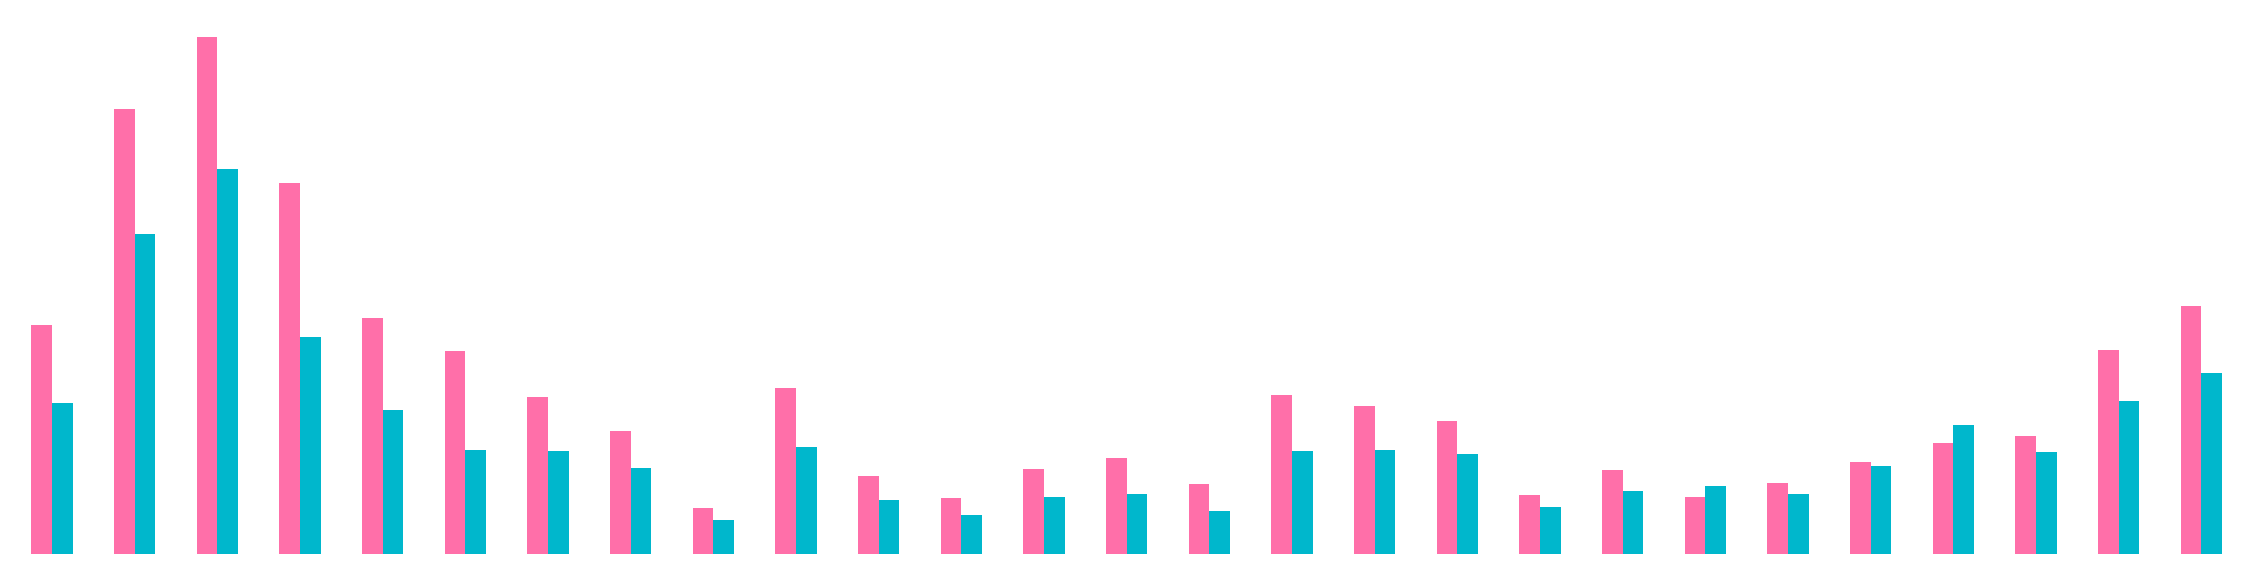

In [15]:
# minimalist graph version (art)
ax = chart_df.plot.bar(
    figsize=(40,10), 
    yticks=None, 
    legend=False,
    color=[(1,0.435,0.663), (0,0.718,0.8)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(
    which='both',
    left=False,
    bottom=False,
    top=False,
    labelbottom=False,
    labelleft=False,
)
ax.axes.get_yaxis().get_label().set_visible(False)
ax.axes.get_xaxis().get_label().set_visible(False)
plt.savefig('graph_art.png', dpi=300, transparent=True)
plt.show()